In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [54]:
df = pd.read_csv("../data/train.csv").drop("id",axis=1)
print('Données d\'entrainement chargées')
print(df.head(5))

Données d'entrainement chargées
   feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       1       0   
2       0       0       0       0       0       0       0       1       0   
3       1       0       0       1       6       1       5       0       0   
4       0       0       0       0       0       0       0       0       0   

   feat_10   ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  \
0        0   ...           1        0        0        0        0        0   
1        0   ...           0        0        0        0        0        0   
2        0   ...           0        0        0        0        0        0   
3        1   ...           0        1        2        0        0        0   
4        0   ...           1        0        0        0        0        1   

   feat_91  feat_92  feat_93   target  
0 

In [55]:
# Récupération des labels
labels = df["target"].values
y = []
for label in labels:
    y.append(int(label[-1:])-1)
y = np.asarray(y)

# Récupérations des features sous forme de ndarray
df_train = df.drop("target", axis=1)
X = df_train.values

print('X shape : '+str(X.shape))
print('y shape : '+str(y.shape))

X shape : (61878, 93)
y shape : (61878,)


# Avec RFE (cv)

In [49]:
#clf = MultinomialNB()
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rfecv = RFECV(estimator=clf,step=1, cv=StratifiedKFold(5), scoring='neg_log_loss')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='neg_log_loss', step=1, verbose=0)

Optimal number of features : 85


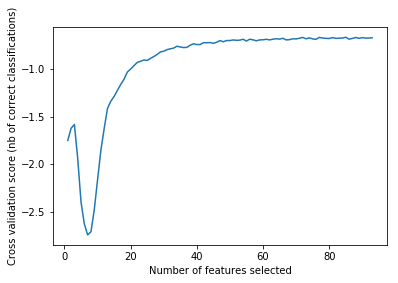

In [50]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [51]:
print(rfecv.ranking_.shape )
print(rfecv.support_.shape)

(93,)
(93,)


In [52]:
print(np.where(rfecv.support_ == True))

(array([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91]),)


# Avec K best (chi2)

In [56]:
print('X shape : '+str(X.shape))
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print('X new shape : '+str(X_new.shape))

X shape : (61878, 93)
X new shape : (61878, 20)


In [57]:
print(X[2])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 6 0 0 2 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
